In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]= "2"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

In [2]:
import json
import pandas as pd
from unidecode import unidecode
from sklearn.model_selection import train_test_split
import seaborn as sns

In [25]:
f = open("uit_member.json")
data = json.load(f)

In [26]:
len(data)

8757

In [36]:
first_name =[]
last_name =[]
full_name =[]
label = []
for i in data:
    last_name.append(unidecode(i["last_name"]).lower())
    first_name.append(unidecode(i["first_name"]).lower())
    full_name.append(unidecode(i["full_name"]).lower())
    label.append(1)
print("Done")
print(last_name[0:5])
print(first_name[0:5])
print(full_name[0:5])

Done
['nguyen thi nhu', 'le hoang', 'dinh van', 'nguyen echam', 'nguyen xuan']
['quynh', 'quan', 'phuong', 'samuel', 'sang']
['nguyen thi nhu quynh', 'le hoang quan', 'dinh van phuong', 'nguyen echam samuel', 'nguyen xuan sang']


In [28]:
"""
full_name_aug = []
label_aug = []
for i in last_name:
    for j in first_name:
        full_name_aug.append(last_name+first_name)
        label.append(1)
print("Done")
print(full_name_aug[0:5])
"""

'\nfull_name_aug = []\nlabel_aug = []\nfor i in last_name:\n    for j in first_name:\n        full_name_aug.append(last_name+first_name)\n        label.append(1)\nprint("Done")\nprint(full_name_aug[0:5])\n'

In [37]:
# Convert to dataframe and labeling
df1 = pd.DataFrame([full_name, label])
df1 = df1.transpose()
df1.columns = ["name", "label"]
df1.head()

,name,label
0,nguyen thi nhu quynh,1
1,le hoang quan,1
2,dinh van phuong,1
3,nguyen echam samuel,1
4,nguyen xuan sang,1


In [38]:
df2 = pd.read_excel("vip.xlsx")
df2.head()

,name,label
0,CHI NHáNH CôNG TY TNHH TậP ĐOàN ĐầU Tư HOA SEN...,0.0
1,Chi Nhánh Công Ty Cổ Phần Thương Mại Dịch Vụ K...,0.0
2,Công ty Cổ phần Công nghệ Y Sinh học và Thực p...,0.0
3,Hợp tác xã cơ khí Phương Nam,0.0
4,HTX khai thác cá biển bắc hải,0.0


In [39]:
full_name2 =[]
label2 = []
for i in df2["name"]:
    full_name2.append(unidecode(i).lower())
    label2.append(0)
print("Done")
print(full_name2[0:5])

Done
['chi nhanh cong ty tnhh tap doan dau tu hoa sen tai son dong', 'chi nhanh cong ty co phan thuong mai dich vu ket noi viet', 'cong ty co phan cong nghe y sinh hoc va thuc pham dinh duong viet nam', 'hop tac xa co khi phuong nam', 'htx khai thac ca bien bac hai']


In [40]:
# Convert to dataframe and labeling
df2 = pd.DataFrame([full_name2, label2])
df2 = df2.transpose()
df2.columns = ["name", "label"]
df2.head()

,name,label
0,chi nhanh cong ty tnhh tap doan dau tu hoa sen...,0
1,chi nhanh cong ty co phan thuong mai dich vu k...,0
2,cong ty co phan cong nghe y sinh hoc va thuc p...,0
3,hop tac xa co khi phuong nam,0
4,htx khai thac ca bien bac hai,0


In [41]:
X = pd.concat([df1, df2])
X.tail()

,name,label
8102,cty tnhh thuong mai xuat nhap khau dong xanh xanh,0
8103,dntn hoa dung,0
8104,cty tnhh thuong mai dich vu xay dung sy nguyen,0
8105,cty co phan san xuat thuong mai xuat nhap khau...,0
8106,vpls son dung,0


In [42]:
data_train, data_test = train_test_split(X, test_size=0.2, random_state=102, stratify = X["label"])
print(f'X_train: {data_train.shape}, X_test: {data_test.shape}')

X_train: (13491, 2), X_test: (3373, 2)


/home/haipn/.conda/envs/hai-gpu/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    7005
0    6486
Name: label, dtype: int64

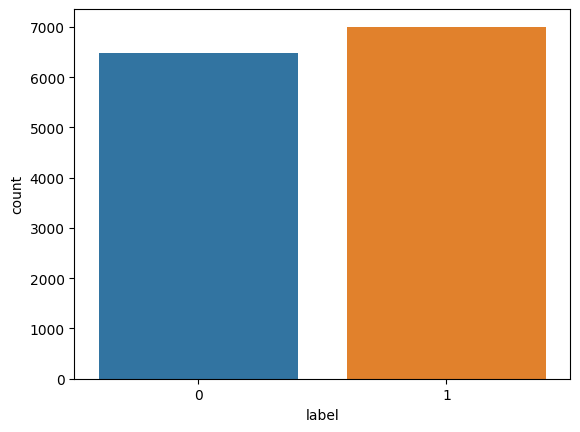

In [43]:
# Distribution of the Target variable.
sns.countplot(data_train["label"])
data_train["label"].value_counts()

/home/haipn/.conda/envs/hai-gpu/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    1752
0    1621
Name: label, dtype: int64

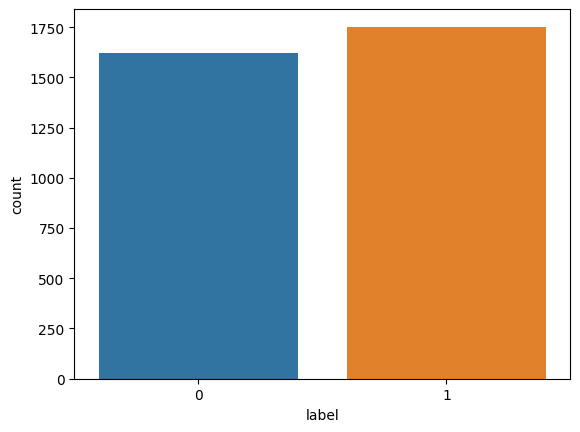

In [44]:
# Distribution of the Target variable.
sns.countplot(data_test["label"])
data_test["label"].value_counts()

In [45]:
data_train.to_csv("data_train_moredata.csv")
data_test.to_csv("data_test_moredata.csv")